<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/color_spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/4.jpg

--2023-07-03 06:17:55--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/4.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32106 (31K) [image/jpeg]
Saving to: ‘4.jpg’

4.jpg               100%[===================>]  31.35K  --.-KB/s    in 0.003s  

2023-07-03 06:17:56 (9.55 MB/s) - ‘4.jpg’ saved [32106/32106]



## more about RGB(or BGR) images

In [ ]:
img=cv2.imread('./4.jpg')
B=img[:,:,0]
G=img[...,1]
R=img[...,2]

# یا میتوان از این دستور استفاده کرد

In [ ]:
b,g,r=cv2.split(img)

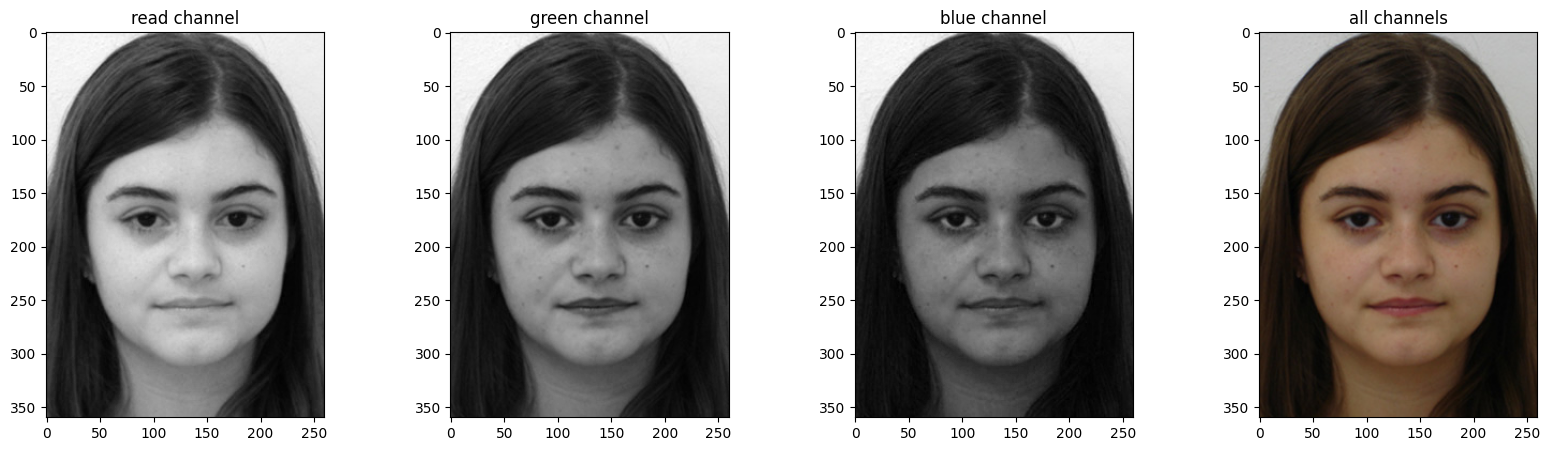

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title('read channel');
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title('green channel');
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title('blue channel');

plt.subplot(144);plt.imshow(img[...,::-1]);plt.title('all channels');

# کردن تصویر merge

In [ ]:
merged=cv2.merge([b,g,r])

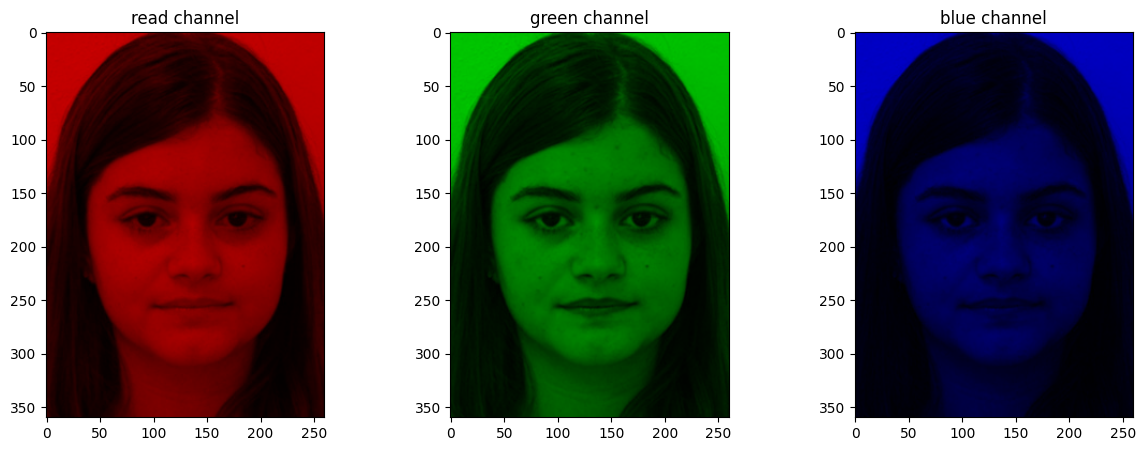

In [ ]:
zeros=np.zeros_like(r,'uint8')
red=cv2.merge([zeros,zeros,r])
green=cv2.merge([zeros,g,zeros])
blue=cv2.merge([b,zeros,zeros ])

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(red[...,::-1]);plt.title('read channel');
plt.subplot(142);plt.imshow(green[...,::-1]);plt.title('green channel');
plt.subplot(143);plt.imshow(blue[...,::-1]);plt.title('blue channel');


# تغییر مقدار رنگ کانالها

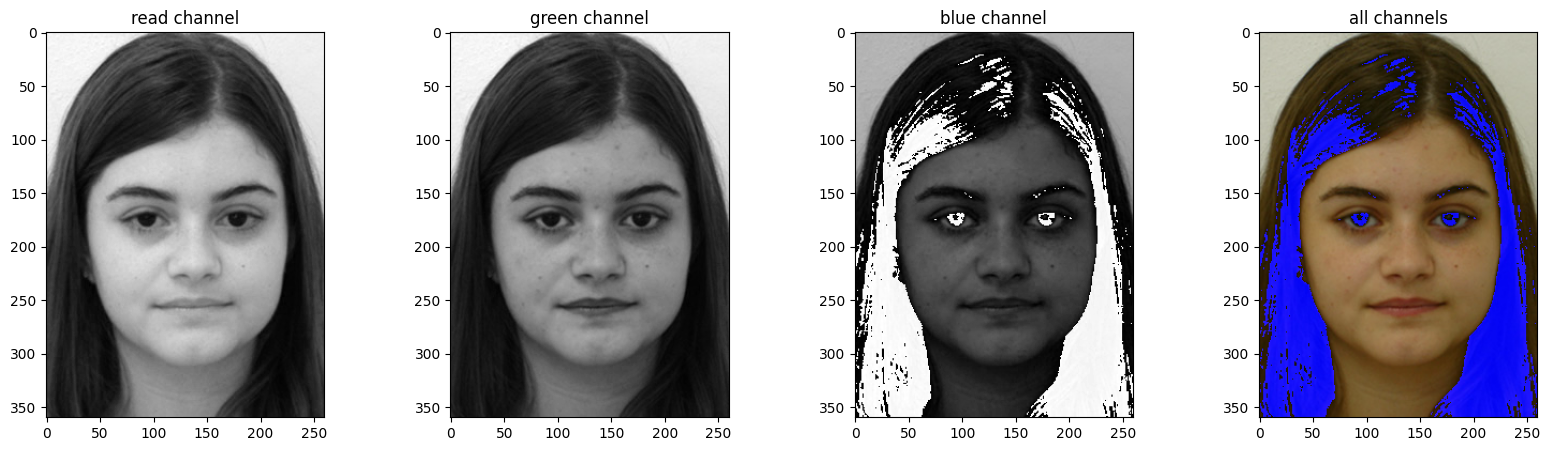

In [ ]:
img=cv2.imread('./4.jpg')
b,g,r=cv2.split(img)


modified_b=b+240
merged=cv2.merge([modified_b,g,r])

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title('read channel');
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title('green channel');
plt.subplot(143);plt.imshow(modified_b,cmap='gray');plt.title('blue channel');

plt.subplot(144);plt.imshow(merged[...,::-1]);plt.title('all channels');

# این مشکل به دلیل سر ریز شدن عدد اینتجر 8 است و میتوان با راه حل های زیر مشکل را حل کرد

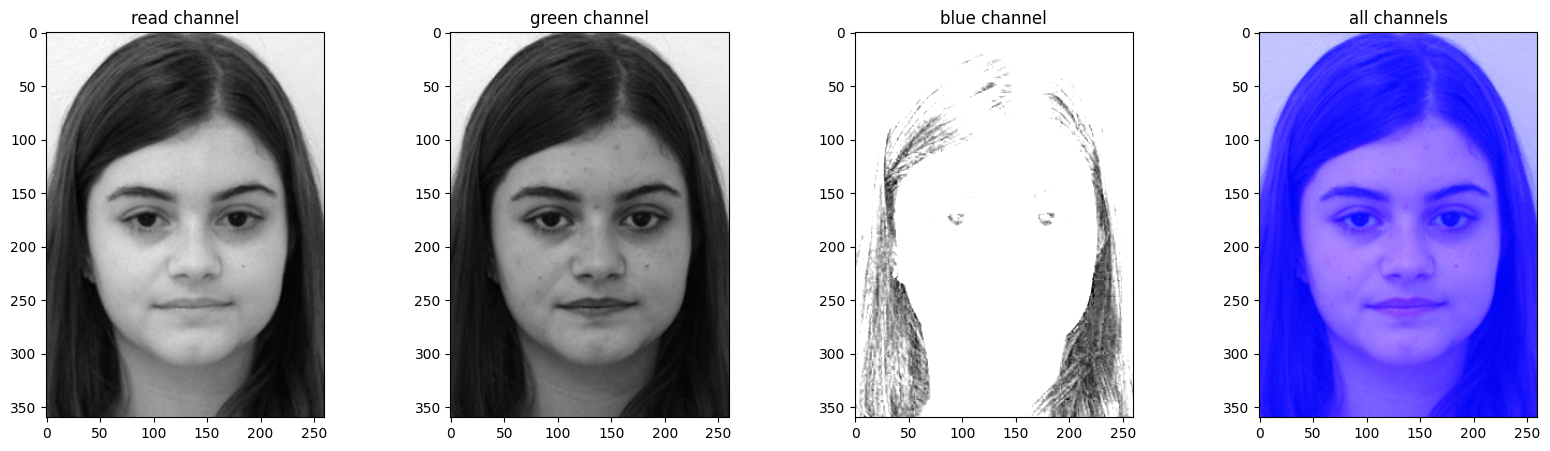

In [ ]:
modified_b=b.astype('int16')+240
modified_b=np.minimum(modified_b,255)
modified_b=modified_b.astype('uint8')

merged=cv2.merge([modified_b,g,r])

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title('read channel');
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title('green channel');
plt.subplot(143);plt.imshow(modified_b,cmap='gray');plt.title('blue channel');

plt.subplot(144);plt.imshow(merged[...,::-1]);plt.title('all channels');

میتوان سه خط دستور اول بالا را با دستور زیر جایگزین کرد

In [ ]:
cv2.add(b,240)

حال یک مقایسه بین دو دستور داشته باشیم

In [ ]:
modified_b==cv2.add(b,240)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

اگر همه درست بودند درست را برگردان

In [ ]:
np.all(modified_b==cv2.add(b,240))

True

یا با دستور assert آن را چک کرد

In [ ]:
assert np.all(modified_b==cv2.add(b,240))

اگر اشتباه جمع کرده بودیم

In [ ]:
assert np.all(modified_b==b+240)

AssertionError: ignored

# HSV فضای رنگ
# Hue= color Value(0-179) اصلا چه رنگی باشد. مثلا قرمز
# saturation (0-255) چقدر از اون قرمزه داشته باشه
# value (0-255)brithness چقدر تاریک و روشن باشه

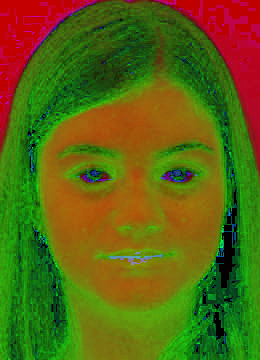

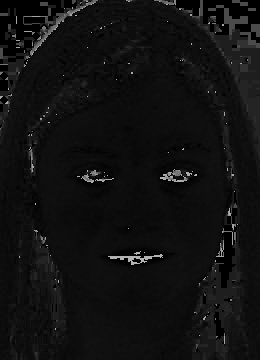

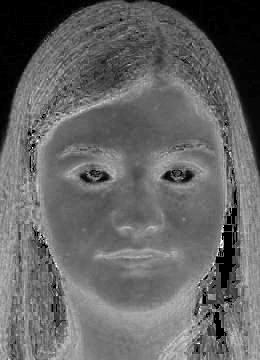

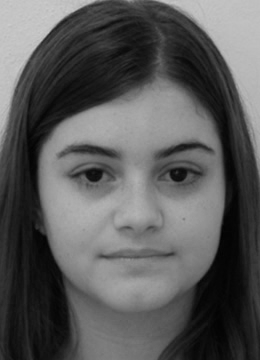

In [ ]:
from matplotlib.colors import hsv_to_rgb
from google.colab.patches import cv2_imshow
img=cv2.imread('./4.jpg')
hsv_image=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_image)
cv2_imshow(hsv_image[...,0])
cv2_imshow(hsv_image[...,1])
cv2_imshow(hsv_image[...,2])


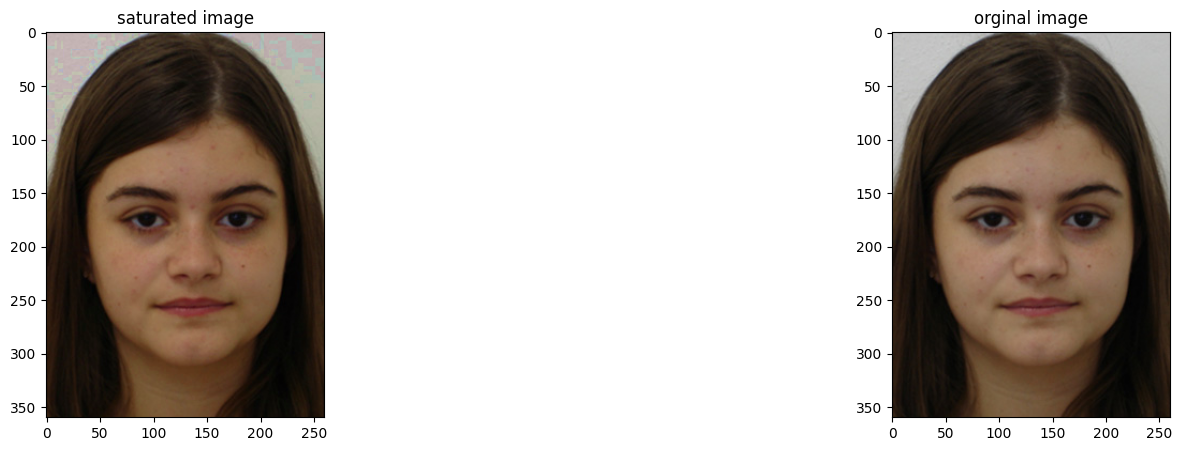

In [ ]:
saturated_image=cv2.merge([hsv_image[:,:,0],cv2.add(hsv_image[...,1],20),hsv_image[...,2]])
saturated_image=cv2.cvtColor(saturated_image,cv2.COLOR_HSV2BGR)

plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(saturated_image[...,::-1]);plt.title('saturated image');
plt.subplot(122);plt.imshow(img[...,::-1]);plt.title('orginal image');

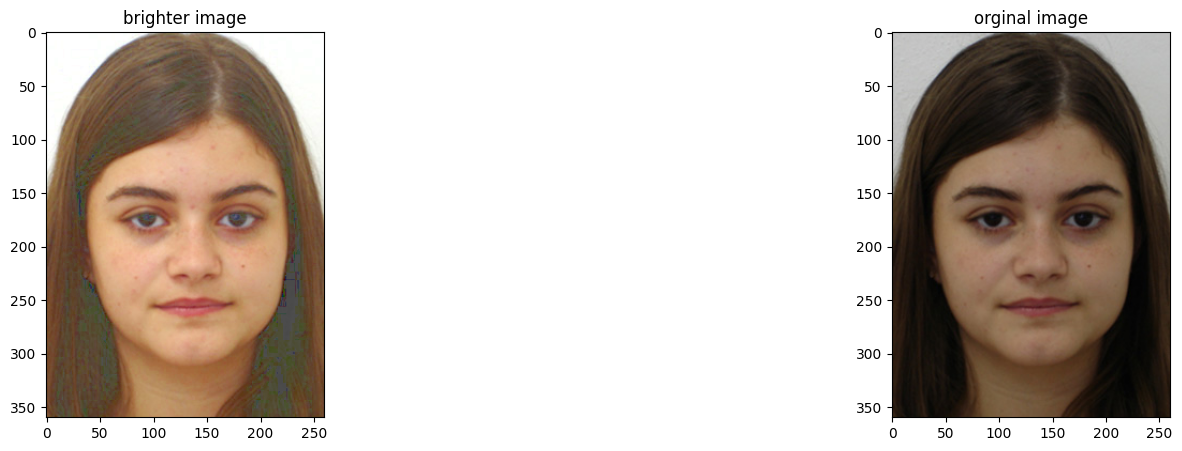

In [ ]:
saturated_image=cv2.merge([hsv_image[:,:,0],hsv_image[...,1],cv2.add(hsv_image[...,2],70)])
saturated_image=cv2.cvtColor(saturated_image,cv2.COLOR_HSV2BGR)

plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(saturated_image[...,::-1]);plt.title('brighter image');
plt.subplot(122);plt.imshow(img[...,::-1]);plt.title('orginal image');

# کانال آلفا و تصاویر 4 کاناله

In [44]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/transparency.png

--2023-07-03 10:43:00--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/transparency.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226933 (222K) [image/png]
Saving to: ‘transparency.png’

transparency.png    100%[===================>] 221.61K  --.-KB/s    in 0.03s   

2023-07-03 10:43:01 (7.13 MB/s) - ‘transparency.png’ saved [226933/226933]



In [45]:
import cv2
import matplotlib.pyplot as plt

In [47]:
img=cv2.imread('./transparency.png',cv2.IMREAD_UNCHANGED)#عکس را بدون تغییر بخوان و به کانالهای آن دست نزن
print(img.shape)

(600, 800, 4)


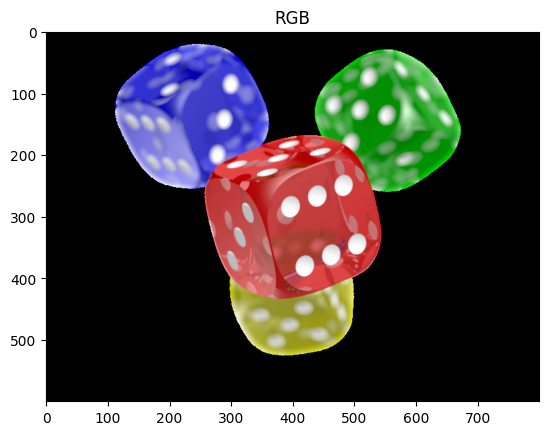

In [49]:
bgr_image = img[...,0:3]
alpha_image = img[...,-1]
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image); plt.title("RGB");

Text(0.5, 1.0, 'alpha')

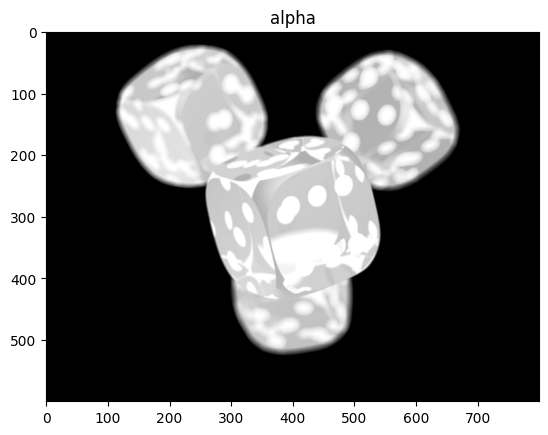

In [50]:
plt.imshow(alpha_image,cmap='gray');plt.title('alpha')

In [53]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/alpha.png

--2023-07-03 11:09:07--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/alpha.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1718187 (1.6M) [image/png]
Saving to: ‘alpha.png’

alpha.png           100%[===================>]   1.64M  --.-KB/s    in 0.07s   

2023-07-03 11:09:08 (24.5 MB/s) - ‘alpha.png’ saved [1718187/1718187]



(704, 1000, 4)


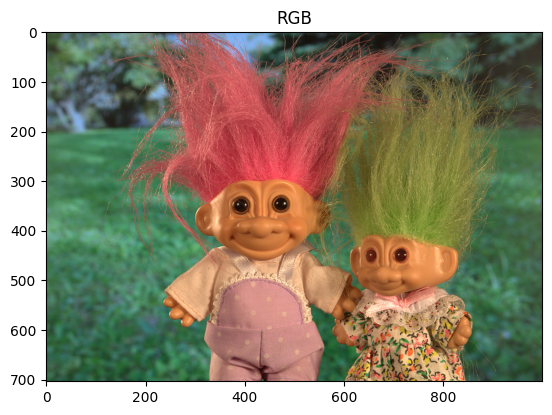

In [54]:
img=cv2.imread('./alpha.png',cv2.IMREAD_UNCHANGED)# عکس را بدون تغییر بخوان و به کانالهای آن دست نزن وآن را بی جی آر نکن
print(img.shape)
bgr_image = img[...,0:3]
alpha_image = img[...,-1]
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image); plt.title("RGB");

Text(0.5, 1.0, 'alpha')

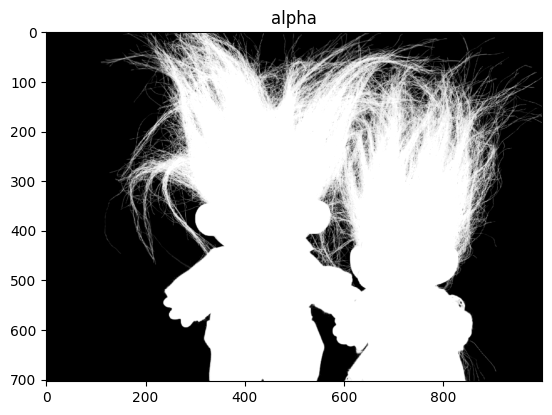

In [55]:
plt.imshow(alpha_image,cmap='gray');plt.title('alpha')


<div style="direction:rtl;text-align:right;font-family:Tahoma">
مقدار $\alpha$ مقداری بین 0 تا 255 است که تقسیم بر 255 خواهد شد و فرمول زیر را خواهیم داشت:
<br/>
پس خواهیم داشت: $0 \leq \alpha \leq 1$</div>

$I = \alpha F + (1 - \alpha) B$

<div style="direction:rtl;text-align:right;font-family:Tahoma">
طبق فرمول بالا
    <br/>
    
 - وقتی $\alpha = 0$, خروجی تصویر پس زمینه است.
 - وقتی $\alpha = 1$, خروجی تصویر شما یا زمینه است
 - وقتی $0 < \alpha < 1$
    یک ترکیب از تصویر و تصویر پس زمینه است
</div>


PNG image from [Alpha matting evaluation website](http://www.alphamatting.com/datasets.php)

# عملیات بیتی، ماسک کردن تصویر و ایجاد یک تصویر PNG